# Final Assessment Scratch Pad

## Instructions

1. Please use only this Jupyter notebook to work on your model, and **do not use any extra files**. If you need to define helper classes or functions, feel free to do so in this notebook.
2. This template is intended to be general, but it may not cover every use case. The sections are given so that it will be easier for us to grade your submission. If your specific use case isn't addressed, **you may add new Markdown or code blocks to this notebook**. However, please **don't delete any existing blocks**.
3. If you don't think a particular section of this template is necessary for your work, **you may skip it**. Be sure to explain clearly why you decided to do so.

## Report

**[TODO]**

Please provide a summary of the ideas and steps that led you to your final model. Someone reading this summary should understand why you chose to approach the problem in a particular way and able to replicate your final model at a high level. Please ensure that your summary is detailed enough to provide an overview of your thought process and approach but also concise enough to be easily understandable. Also, please follow the guidelines given in the `main.ipynb`.

This report should not be longer than **1-2 pages of A4 paper (up to around 1,000 words)**. Marks will be deducted if you do not follow instructions and you include too many words here. 

**[DELETE EVERYTHING FROM THE PREVIOUS TODO TO HERE BEFORE SUBMISSION]**

##### Overview
**[TODO]**

##### 1. Descriptive Analysis
**[TODO]**

##### 2. Detection and Handling of Missing Values
**[TODO]**

##### 3. Detection and Handling of Outliers
**[TODO]**

##### 4. Detection and Handling of Class Imbalance 
**[TODO]**

##### 5. Understanding Relationship Between Variables
**[TODO]**

##### 6. Data Visualization
**[TODO]** 
##### 7. General Preprocessing
**[TODO]**
 
##### 8. Feature Selection 
**[TODO]**

##### 9. Feature Engineering
**[TODO]**

##### 10. Creating Models
**[TODO]**

##### 11. Model Evaluation
**[TODO]**

##### 12. Hyperparameters Search
**[TODO]**

##### Conclusion
**[TODO]**

---

# Workings (Not Graded)

You will do your working below. Note that anything below this section will not be graded, but we might counter-check what you wrote in the report above with your workings to make sure that you actually did what you claimed to have done. 

## Import Packages

Here, we import some packages necessary to run this notebook. In addition, you may import other packages as well. Do note that when submitting your model, you may only use packages that are available in Coursemology (see `main.ipynb`).

In [1]:
import pandas as pd
import os
import numpy as np
from util import show_images, dict_train_test_split

## Load Dataset

The dataset provided is multimodal and contains two components, images and tabular data. The tabular dataset `tabular.csv` contains $N$ entries and $F$ columns, including the target feature. On the other hand, the image dataset `images.npy` is of size $(N, H, W)$, where $N$, $H$, and $W$ correspond to the number of data, image width, and image height, respectively. Each image corresponds to the data in the same index of the tabular dataset. These datasets can be found in the `data/` folder in the given file structure.

A code snippet that loads and displays some of the data is provided below.

### Load Tabular Data

In [2]:
df = pd.read_csv(os.path.join('data', 'tabular.csv'))
df

,V0,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V31,V32,V33,V34,V35,V36,V37,V38,V39,target
0,NaN,C1,C1,C61,C2,C0,593467.0,36804.0,473651.0,763304.0,...,156574.0,327088.0,420.0,149982.0,C1,C2,C6,846,148,0
1,NaN,C1,C1,C35,C2,C0,502611.0,29428.0,256499.0,413448.0,...,156340.0,326602.0,564.0,67182.0,C0,C1,C5,866,-1154,0
2,NaN,C2,C2,C42,C2,C0,130495.0,9828.0,80063.0,129190.0,...,156106.0,326116.0,780.0,231402.0,C1,C2,C9,688,1513,0
3,NaN,C1,C1,C46,C12,C0,357881.0,22844.0,268379.0,432588.0,...,156262.0,326440.0,708.0,112906.0,C0,C1,C8,804,2647,0
4,NaN,C1,C1,C56,C2,C0,789119.0,49184.0,482255.0,777166.0,...,156496.0,326926.0,492.0,149982.0,C0,C1,C4,800,-146,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61300,NaN,C1,C1,C26,C2,C1,634795.0,38000.0,453527.0,730882.0,...,156574.0,327088.0,420.0,138942.0,C1,C2,C2,858,-377,0
61301,NaN,C2,C2,C73,C1,C0,758123.0,43348.0,466523.0,751820.0,...,156652.0,327250.0,348.0,76566.0,C0,C1,C9,827,1387,0
61302,NaN,C0,C0,C59,C12,C0,851603.0,49272.0,527435.0,849956.0,...,156652.0,327250.0,348.0,126982.0,C0,C1,C7,864,2794,0
61303,NaN,C2,C2,C47,C5,C0,675303.0,38984.0,338399.0,545398.0,...,156418.0,326764.0,492.0,106926.0,C0,C1,C2,842,757,0


### Load Image Data

Shape: (61305, 7, 7)


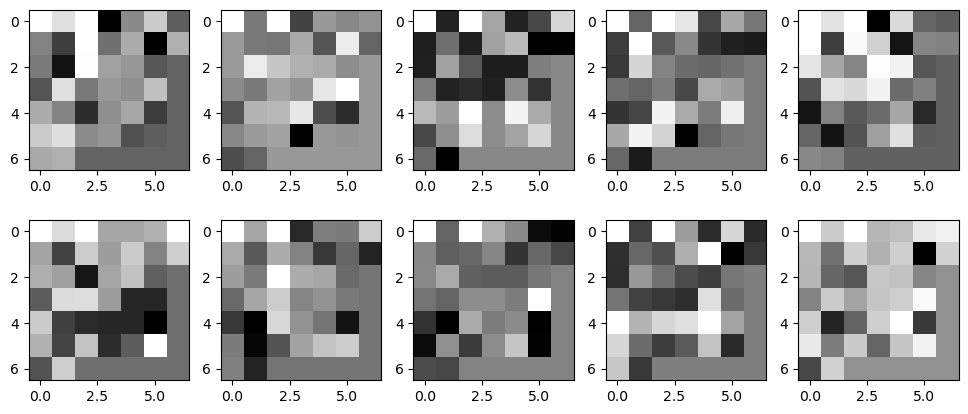

In [3]:
with open(os.path.join('data', 'images.npy'), 'rb') as f:
    images = np.load(f)
    
print('Shape:', images.shape)
show_images(images[:10], n_row=2, n_col=5, figsize=[12,5])

## Data Exploration & Preparation

### 1. Descriptive Analysis

In [21]:
df.describe()

,V6,V7,V8,V9,V10,V11,V12,V13,V14,V19,...,V28,V29,V30,V31,V32,V33,V34,V38,V39,target
count,6.128800e+04,61288.000000,6.128800e+04,6.128800e+04,6.128800e+04,6.104200e+04,6.104200e+04,6.104200e+04,6.104200e+04,6.130500e+04,...,61249.000000,6.130500e+04,6.130500e+04,61305.000000,61305.000000,61305.000000,61305.000000,61305.000000,61305.000000,61305.000000
mean,5.010268e+05,30172.405626,3.032470e+05,4.887642e+05,2.834435e+05,5.801180e+05,6.413405e+05,6.084105e+05,7.647117e+05,6.312083e+09,...,80584.170125,2.137647e+06,6.412306e+06,156444.250648,326818.520577,503.594226,116962.465411,778.254955,739.322731,0.117282
std,2.017553e+05,10852.449527,1.140121e+05,1.836862e+05,9.827222e+04,2.308213e+05,2.327929e+05,2.171502e+05,2.519077e+05,9.033995e+07,...,20874.189854,4.346647e+05,1.303994e+06,135.585524,281.600704,123.750704,54236.481899,57.354029,1207.023061,0.321759
min,1.150000e+02,760.000000,2.510000e+02,6.040000e+02,1.430000e+02,1.050000e+02,7.590000e+02,9.000000e+01,4.330000e+02,6.155568e+09,...,236.000000,1.452680e+05,4.351690e+05,156106.000000,326116.000000,204.000000,43170.000000,678.000000,-1385.000000,0.000000
25%,3.451710e+05,22024.000000,2.221460e+05,3.581015e+05,2.154970e+05,4.001500e+05,4.645560e+05,4.553875e+05,5.867730e+05,6.231600e+09,...,64784.000000,1.828598e+06,5.485159e+06,156340.000000,326602.000000,420.000000,77394.000000,729.000000,-314.000000,0.000000
50%,5.012170e+05,30048.000000,3.000770e+05,4.836570e+05,2.806310e+05,5.767550e+05,6.379470e+05,6.040500e+05,7.540870e+05,6.307632e+09,...,79964.000000,2.195648e+06,6.586309e+06,156418.000000,326764.000000,492.000000,106926.000000,780.000000,778.000000,0.000000
75%,6.362710e+05,36816.000000,3.802670e+05,6.128520e+05,3.477370e+05,7.351200e+05,7.788000e+05,7.584700e+05,9.310530e+05,6.391872e+09,...,94304.000000,2.458868e+06,7.375969e+06,156574.000000,327088.000000,564.000000,145290.000000,829.000000,1744.000000,0.000000
max,2.750641e+06,147564.000000,1.364111e+06,2.197934e+06,1.203121e+06,3.170160e+06,3.174345e+06,2.670660e+06,3.121145e+06,6.468336e+09,...,545852.000000,3.451298e+06,1.035326e+07,156730.000000,327412.000000,852.000000,690482.000000,877.000000,2794.000000,1.000000


In [20]:
df.mode()

,V0,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V31,V32,V33,V34,V35,V36,V37,V38,V39,target
0,C0,C1,C1,C73,C13,C0,280555.0,19880.0,151235.0,243856.0,...,156496.0,326926.0,420.0,85306.0,C1,C2,C6,835,1366,0


### 2. Detection and Handling of Missing Values

In [28]:
# Drops rows that have missing data
df.dropna(how="any")

,V0,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V31,V32,V33,V34,V35,V36,V37,V38,V39,target
79,C0,C1,C1,C29,C1,C0,622495.0,36752.0,394631.0,635994.0,...,156574.0,327088.0,420.0,182274.0,C0,C1,C8,845,2332,0
143,C0,C1,C1,C35,C13,C0,317209.0,21596.0,266975.0,430326.0,...,156418.0,326764.0,564.0,91102.0,C0,C1,C4,765,-587,0
148,C0,C1,C1,C56,C4,C0,666611.0,39380.0,436931.0,704144.0,...,156418.0,326764.0,564.0,198650.0,C0,C1,C5,727,1324,0
160,C0,C2,C2,C37,C11,C0,362555.0,24552.0,293435.0,472956.0,...,156262.0,326440.0,708.0,204722.0,C0,C1,C8,804,2668,0
166,C0,C2,C2,C73,C2,C0,778131.0,40408.0,465875.0,750776.0,...,156730.0,327412.0,276.0,77394.0,C1,C2,C5,786,1618,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61150,C0,C1,C1,C53,C13,C0,243409.0,16924.0,214199.0,345298.0,...,156262.0,326440.0,708.0,244558.0,C0,C1,C2,823,-1238,0
61151,C0,C1,C1,C40,C6,C0,599945.0,37492.0,405107.0,652872.0,...,156574.0,327088.0,420.0,150902.0,C0,C1,C9,876,589,0
61155,C0,C1,C1,C56,C4,C0,194045.0,14212.0,176831.0,285094.0,...,156262.0,326440.0,708.0,294238.0,C1,C2,C8,846,2437,0
61174,C0,C0,C0,C2,C6,C1,878581.0,48600.0,516743.0,832730.0,...,156652.0,327250.0,348.0,128454.0,C1,C2,C7,828,400,0


In [29]:
# Fills missing data:
df.fillna(value=5)

,V0,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V31,V32,V33,V34,V35,V36,V37,V38,V39,target
0,5,C1,C1,C61,C2,C0,593467.0,36804.0,473651.0,763304.0,...,156574.0,327088.0,420.0,149982.0,C1,C2,C6,846,148,0
1,5,C1,C1,C35,C2,C0,502611.0,29428.0,256499.0,413448.0,...,156340.0,326602.0,564.0,67182.0,C0,C1,C5,866,-1154,0
2,5,C2,C2,C42,C2,C0,130495.0,9828.0,80063.0,129190.0,...,156106.0,326116.0,780.0,231402.0,C1,C2,C9,688,1513,0
3,5,C1,C1,C46,C12,C0,357881.0,22844.0,268379.0,432588.0,...,156262.0,326440.0,708.0,112906.0,C0,C1,C8,804,2647,0
4,5,C1,C1,C56,C2,C0,789119.0,49184.0,482255.0,777166.0,...,156496.0,326926.0,492.0,149982.0,C0,C1,C4,800,-146,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61300,5,C1,C1,C26,C2,C1,634795.0,38000.0,453527.0,730882.0,...,156574.0,327088.0,420.0,138942.0,C1,C2,C2,858,-377,0
61301,5,C2,C2,C73,C1,C0,758123.0,43348.0,466523.0,751820.0,...,156652.0,327250.0,348.0,76566.0,C0,C1,C9,827,1387,0
61302,5,C0,C0,C59,C12,C0,851603.0,49272.0,527435.0,849956.0,...,156652.0,327250.0,348.0,126982.0,C0,C1,C7,864,2794,0
61303,5,C2,C2,C47,C5,C0,675303.0,38984.0,338399.0,545398.0,...,156418.0,326764.0,492.0,106926.0,C0,C1,C2,842,757,0


### 3. Detection and Handling of Outliers

In [38]:
outliers = df.describe(percentiles=[.1, .9]).loc[["10%", "90%"]]
outliers

,V6,V7,V8,V9,V10,V11,V12,V13,V14,V19,...,V28,V29,V30,V31,V32,V33,V34,V38,V39,target
10%,256693.0,17349.6,154187.0,248612.0,164341.0,300020.0,364071.0,324127.0,439333.0,6.186672e+09,...,53744.0,1526960.0,4580245.0,156262.0,326440.0,348.0,62398.0,698.0,-965.0,0.0
90%,750579.0,43852.0,446373.8,719357.4,406238.7,865555.0,935835.0,879640.0,1080545.0,6.438096e+09,...,107264.0,2657696.0,7972453.0,156652.0,327250.0,636.0,182274.0,857.0,2395.0,1.0


### 4. Detection and Handling of Class Imbalance

### 5. Understanding Relationship Between Variables

### 6. Data Visualization

## Data Preprocessing

### 7. General Preprocessing

### 8. Feature Selection

### 9. Feature Engineering

## Modeling & Evaluation

### 10. Creating models

### 11. Model Evaluation

### 12. Hyperparameters Search